# Lab 10 - Python Code
### Grace O'Malley


## Part 3: Building a Predictive - Regression Modeling in Python


**Libraries Import**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import state_union
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
nltk.download('state_union')

[nltk_data] Downloading package state_union to
[nltk_data]     /Users/coniecakes/nltk_data...
[nltk_data]   Package state_union is already up-to-date!


True

In [3]:
# Create empty lists to store our text and years
texts = []
years = []
# Loop through files with corrected year extraction
for fileid in state_union.fileids():
    try:
        text = state_union.raw(fileid)
        # Extract just the year part before the hyphen
        year = int(fileid.split('-')[0])
        texts.append(text)
        years.append(year)
    except Exception as e:
        print(f"Error processing file {fileid}: {str(e)}")

# Create dataframe
speeches_df = pd.DataFrame({'text': texts, 'year': years})
print(f"Number of speeches: {len(speeches_df)}")

Number of speeches: 65


In [4]:
print(f"Year range: {speeches_df['year'].min()} to {speeches_df['year'].max()}")
print()
print("\nFirst few rows:")
print()
print(speeches_df.head())

Year range: 1945 to 2006


First few rows:

                                                text  year
0  PRESIDENT HARRY S. TRUMAN'S ADDRESS BEFORE A J...  1945
1  PRESIDENT HARRY S. TRUMAN'S MESSAGE TO THE CON...  1946
2  PRESIDENT HARRY S. TRUMAN'S ANNUAL MESSAGE TO ...  1947
3  PRESIDENT HARRY S. TRUMAN'S ANNUAL MESSAGE TO ...  1948
4  PRESIDENT HARRY S. TRUMAN'S ANNUAL MESSAGE TO ...  1949


In [5]:
# Create TF-IDF features
vectorizer = TfidfVectorizer(
    max_features=5000, # Limit to top 5000 terms
    min_df=2, # Term must appear in at least 2 speeches
    max_df=0.95, # Term must appear in at most 95% of speeches
    ngram_range=(1, 2) # Include both single words and pairs of words
)

# Create feature matrix
X = vectorizer.fit_transform(speeches_df['text'])
y = speeches_df['year']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Feature matrix shape:", X.shape)
print()
print("Number of speeches in training set:", X_train.shape[0])
print()
print("Number of speeches in test set:", X_test.shape[0])

Feature matrix shape: (65, 5000)

Number of speeches in training set: 52

Number of speeches in test set: 13


In [6]:
# Train Ridge regression model
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

Ridge()

In [7]:
# Make predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Calculate error metrics
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

print("\nModel Performance:")
print()
print(f"Training RMSE: {train_rmse:.2f} years")
print()
print(f"Test RMSE: {test_rmse:.2f} years")


Model Performance:

Training RMSE: 4.67 years

Test RMSE: 11.39 years


In [8]:
# Look at most important features
feature_names = vectorizer.get_feature_names_out()
feature_importance = pd.DataFrame({'term': feature_names, 'coefficient': model.coef_})

print("Top terms indicating more recent speeches:")
print()
print(feature_importance.nlargest(10, 'coefficient')[['term', 'coefficient']])
print()
print("Top terms indicating older speeches:")
print()
print(feature_importance.nsmallest(10, 'coefficient')[['term', 'coefficient']])


Top terms indicating more recent speeches:

           term  coefficient
414    applause    17.371654
4636         ve     6.778458
3320         re     6.137748
4494    tonight     5.415549
4744      we ve     4.700615
2131       iraq     4.409544
242   americans     4.343982
4736      we re     4.297928
828    children     4.102932
3910      thank     3.975980

Top terms indicating older speeches:

                 term  coefficient
3618            shall    -6.700277
2252            labor    -4.494757
3194       production    -3.880756
3203          program    -3.806903
3638           should    -3.700261
2500  million dollars    -3.673826
20               1947    -3.549236
1629             free    -3.339913
1437     expenditures    -3.323270
4600             upon    -3.265354


**Training and Evaluating the Regression Model**

In [9]:
# Create and train the model
model = Ridge(alpha=1.0) # alpha is the regularization strength
model.fit(X_train, y_train)

Ridge()

In [10]:
# Make predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
# Calculate error metrics
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

print(f"Training RMSE: {train_rmse:.2f} years")
print()
print(f"Test RMSE: {test_rmse:.2f} years")

Training RMSE: 4.67 years

Test RMSE: 11.39 years


**Interpreting the Regression Results**

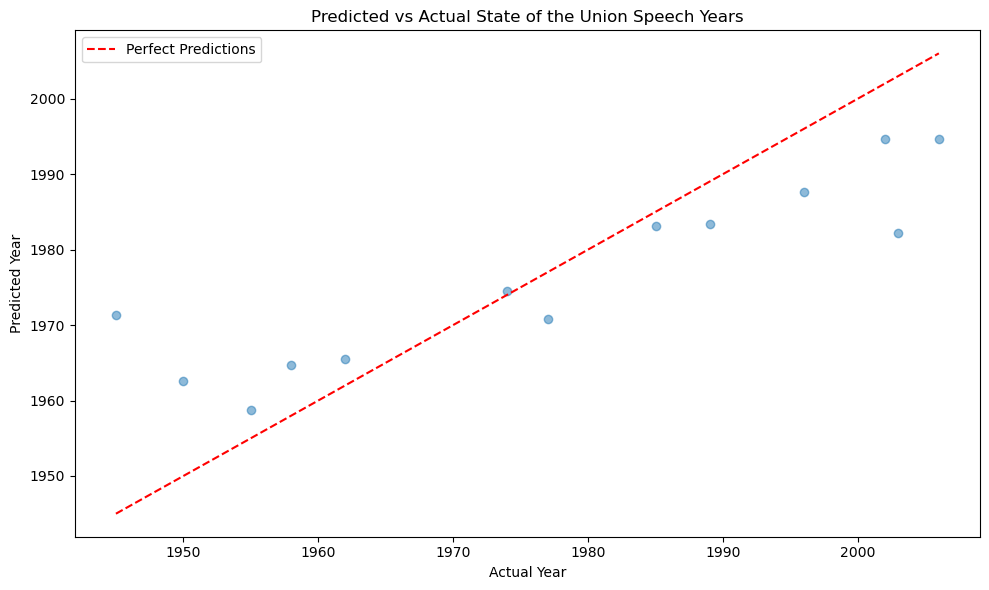

In [11]:
# Create scatter plot of predicted vs actual years
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        'r--', label='Perfect Predictions')
plt.xlabel('Actual Year')
plt.ylabel('Predicted Year')
plt.title('Predicted vs Actual State of the Union Speech Years')
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
# Look at important features
feature_names = vectorizer.get_feature_names_out()
feature_importance = pd.DataFrame({'term': feature_names, 'coefficient': model.coef_})

print("Top terms indicating more recent decisions:")
print(feature_importance.nlargest(10, 'coefficient'))
print()
print("Top terms indicating older decisions:")
print()
print(feature_importance.nsmallest(10, 'coefficient'))

Top terms indicating more recent decisions:
           term  coefficient
414    applause    17.371654
4636         ve     6.778458
3320         re     6.137748
4494    tonight     5.415549
4744      we ve     4.700615
2131       iraq     4.409544
242   americans     4.343982
4736      we re     4.297928
828    children     4.102932
3910      thank     3.975980

Top terms indicating older decisions:

                 term  coefficient
3618            shall    -6.700277
2252            labor    -4.494757
3194       production    -3.880756
3203          program    -3.806903
3638           should    -3.700261
2500  million dollars    -3.673826
20               1947    -3.549236
1629             free    -3.339913
1437     expenditures    -3.323270
4600             upon    -3.265354


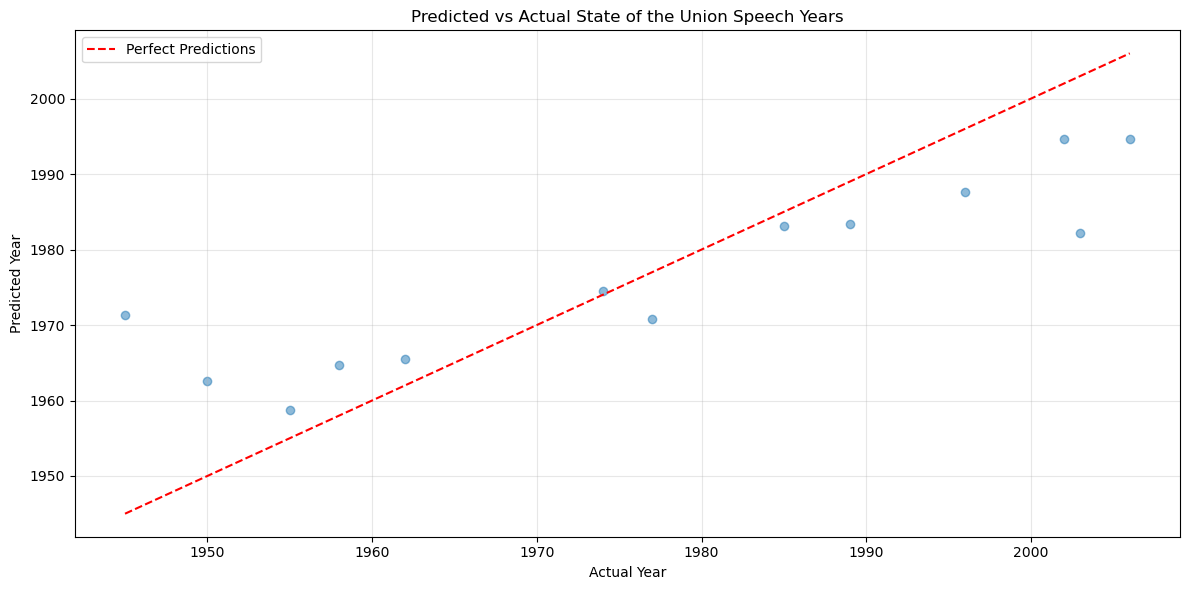

In [13]:
# Create scatter plot of predicted vs actual years
plt.figure(figsize=(12, 6))
plt.scatter(y_test, test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        'r--', label='Perfect Predictions')
plt.xlabel('Actual Year')
plt.ylabel('Predicted Year')
plt.title('Predicted vs Actual State of the Union Speech Years')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

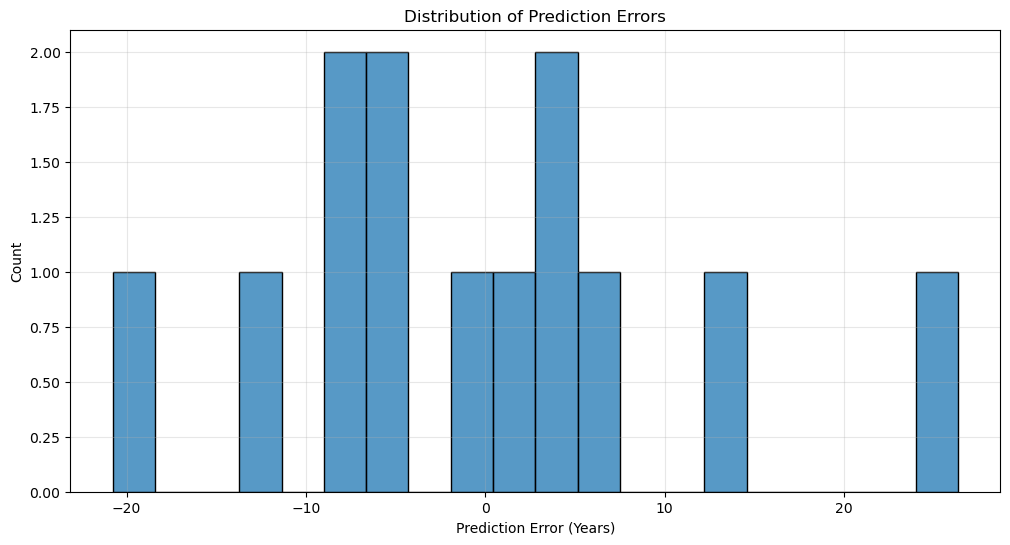

In [14]:
# Calculate prediction errors
test_errors = test_pred - y_test
# Plot distribution of errors
plt.figure(figsize=(12, 6))
sns.histplot(test_errors, bins=20)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error (Years)')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()

In [15]:
# Print detailed metrics
print("Detailed Regression Metrics:")
print()
print(f"Training RMSE: {train_rmse:.2f} years")
print()
print(f"Test RMSE: {test_rmse:.2f} years")
print()
print(f"Mean Absolute Error: {np.mean(np.abs(test_errors)):.2f} years")
print()
print(f"Median Absolute Error: {np.median(np.abs(test_errors)):.2f} years")
print()
print(f"90% of predictions within: {np.percentile(np.abs(test_errors), 90):.2f} years")

Detailed Regression Metrics:

Training RMSE: 4.67 years

Test RMSE: 11.39 years

Mean Absolute Error: 8.85 years

Median Absolute Error: 6.75 years

90% of predictions within: 19.14 years


In [16]:
# Analyze predictions by time period
y_test_series = pd.Series(y_test)
test_pred_series = pd.Series(test_pred)
errors_by_decade = pd.DataFrame({'decade': (y_test_series // 10) * 10, 'absolute_error': np.abs(test_pred_series - y_test_series)})
print("Mean Absolute Error by Decade:")
print()
print(errors_by_decade.groupby('decade')['absolute_error'].agg(['mean', 'count', 'std']).round(2))
print()
# Look at the most predictive terms for different time periods
print("Most Time-Indicative Terms:")
feature_importance = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'coefficient': model.coef_})
print()
print("Terms indicating more recent speeches (largest positive coefficients):")
print()
print(feature_importance.nlargest(15, 'coefficient')[['term', 'coefficient']].round(3))
print()
print("Terms indicating older speeches (largest negative coefficients):")
print()
print(feature_importance.nsmallest(15, 'coefficient')[['term', 'coefficient']].round(3))
print()

Mean Absolute Error by Decade:

         mean  count   std
decade                    
1940.0  42.62      1   NaN
1950.0  25.59      3  6.38
1960.0    NaN      0   NaN
1970.0    NaN      0   NaN
1980.0    NaN      0   NaN
1990.0    NaN      0   NaN
2000.0    NaN      0   NaN

Most Time-Indicative Terms:

Terms indicating more recent speeches (largest positive coefficients):

              term  coefficient
414       applause       17.372
4636            ve        6.778
3320            re        6.138
4494       tonight        5.416
4744         we ve        4.701
2131          iraq        4.410
242      americans        4.344
4736         we re        4.298
828       children        4.103
3910         thank        3.976
3895    terrorists        3.758
801        century        3.481
38    21st century        3.406
37            21st        3.389
2318           let        3.255

Terms indicating older speeches (largest negative coefficients):

                 term  coefficient
3618     

In [17]:
# Calculate and display R-squared score
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, train_pred)
r2_test = r2_score(y_test, test_pred)
print("Model R-squared scores:")
print()
print(f"Training R-squared: {r2_train:.3f}")
print()
print(f"Test R-squared: {r2_test:.3f}")

Model R-squared scores:

Training R-squared: 0.924

Test R-squared: 0.696


## Part 4: Classification Modeling in Python

**Setup and Data Preparation**

In [18]:
# Read the complaints data
complaints_df = pd.read_csv('/Users/coniecakes/Library/CloudStorage/OneDrive-Personal/001. Documents - Main/023. Programming Tools/R Studio/AdvTxtAnalytics/data_files/data/complaints.csv')
# Select relevant columns
complaints_df = complaints_df[['consumer_complaint_narrative', 'product']]
# Create binary classification target
most_common_product = complaints_df['product'].mode()[0]
complaints_df['label'] = (complaints_df['product'] == most_common_product).astype(int)
# Remove any rows with missing values
complaints_df = complaints_df.dropna()
print("Class distribution:")
print()
print(complaints_df['label'].value_counts(normalize=True))
print()

Class distribution:

label
0    0.526012
1    0.473988
Name: proportion, dtype: float64



**Create Features for Classification**

In [19]:
# Create TF-IDF features
vectorizer_class = TfidfVectorizer(
    max_features=5000,
    min_df=5,
    max_df=0.7,
    ngram_range=(1, 2)
)

# Transform the text data
X = vectorizer_class.fit_transform(complaints_df['consumer_complaint_narrative'])
y = complaints_df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Feature matrix shape:", X.shape)

Feature matrix shape: (117214, 5000)


**Training and Evaluating the Classification Model**

In [20]:
# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [21]:
nb_pred = nb_model.predict(X_test)

# Train Lasso model
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
lasso_model.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [22]:
lasso_pred = lasso_model.predict(X_test)

# Calculate accuracies
nb_accuracy = accuracy_score(y_test, nb_pred)
lasso_accuracy = accuracy_score(y_test, lasso_pred)

In [23]:
print("Model Accuracies:")
print(f"Naive Bayes: {nb_accuracy:.3f}")
print()
print(f"Lasso: {lasso_accuracy:.3f}")

Model Accuracies:
Naive Bayes: 0.846

Lasso: 0.901


In [24]:
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_pred))
print()
print("Lasso Classification Report:")
print(classification_report(y_test, lasso_pred))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86     12330
           1       0.85      0.82      0.83     11113

    accuracy                           0.85     23443
   macro avg       0.85      0.84      0.85     23443
weighted avg       0.85      0.85      0.85     23443


Lasso Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     12330
           1       0.91      0.88      0.89     11113

    accuracy                           0.90     23443
   macro avg       0.90      0.90      0.90     23443
weighted avg       0.90      0.90      0.90     23443



**Interpreting the Classification Results**

In [25]:
# Get feature names
feature_names = vectorizer_class.get_feature_names_out()

# Analyze Lasso coefficients
lasso_importance = pd.DataFrame({'term': feature_names, 'coefficient': lasso_model.coef_[0]})

print("Top terms for positive class (Lasso model):")
print(lasso_importance.nlargest(10, 'coefficient'))
print()
print("Top terms for negative class (Lasso model):")
print(lasso_importance.nsmallest(10, 'coefficient'))

Top terms for positive class (Lasso model):
              term  coefficient
1519      experian    21.819071
4788     with acct    21.038892
4478    transunion    20.462404
1471       equifax    17.942551
3349     relate to    11.906440
4250  this section    10.367575
4467         trans     9.375769
2074     inquiries     8.751766
3413     reporting     8.323305
2077       inquiry     8.273626

Top terms for negative class (Lasso model):
            term  coefficient
3631     shocked   -11.155451
800        bonus    -8.296756
1728       funds    -7.993493
4267  threatened    -6.821901
3232        pslf    -6.670670
2685  never sent    -6.508053
1485      escrow    -6.441353
2506  money back    -6.331473
1780     greatly    -6.277848
4321  to collect    -6.173316


In [26]:
# Analyze Naive Bayes feature probabilities
nb_importance = pd.DataFrame({'term': feature_names, 'log_prob_ratio': nb_model.feature_log_prob_[1] - nb_model.feature_log_prob_[0]})
print("Most distinctive terms (Naive Bayes model):")
print(nb_importance.nlargest(10, 'log_prob_ratio'))

Most distinctive terms (Naive Bayes model):
                term  log_prob_ratio
471   and transunion        4.759186
2750      not relate        4.646853
4905    xxxx inquiry        4.643785
4922    xxxx partial        4.611743
4892   xxxx experian        4.483393
2076  inquiries that        4.341632
3349       relate to        4.310021
3348          relate        4.223819
3461        reseller        4.174258
4478      transunion        4.147735
